# Homework 4
## Netflix Movie Rate Clustering
Pınar Köksal

In [17]:
# install.packages('factoextra')
# install.packages('cluster')

require(factoextra)
require(cluster)

Loading required package: factoextra
Warning message:
"package 'factoextra' was built under R version 3.6.3"

In [8]:
movies_path='C:/Users/pinar/Desktop/HW4_data/ETM58D_Spring22_HW4_movie_titles.txt'
ratings_path='C:/Users/pinar/Desktop/HW4_data/ETM58D_Spring22_HW4_Netflix_data.dat'

movies=read.csv(movies_path, header=FALSE, sep="|")
ratings=read.table(ratings_path, header=FALSE, sep="")

Although I downloaded the related packages and my code works in RStudio, I couldn't manage to run the same code here since get_dist function is not recognized. I will add the scatters from R results.

In [16]:
movtable <- data.frame(movies, ratings)

movtable <- na.omit(movtable)
sc <- scale(movtable[1:nrow(movtable),2:ncol(movtable)])
distance <- get_dist(sc)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

ERROR: Error in get_dist(sc): "get_dist" fonksiyonu bulunamadı


In [18]:
# Compute k-means
set.seed(123)
km.res <- kmeans(sc, 4, nstart = 25)

In [ ]:
# Visualize
fviz_cluster(km.res, data = sc,
             palette = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"),
             ggtheme = theme_minimal(),
             main = "Partitioning Clustering Plot",
             geom = "point")

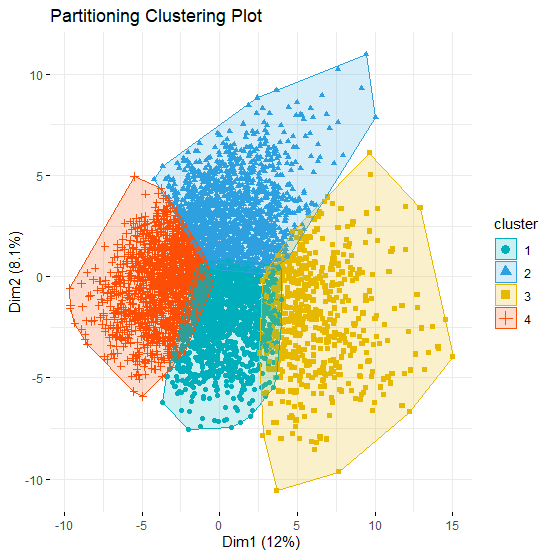

In [ ]:
# Cluster evaluation
fviz_nbclust(sc, kmeans, method = "wss")
fviz_nbclust(sc, kmeans, method = "silhouette")

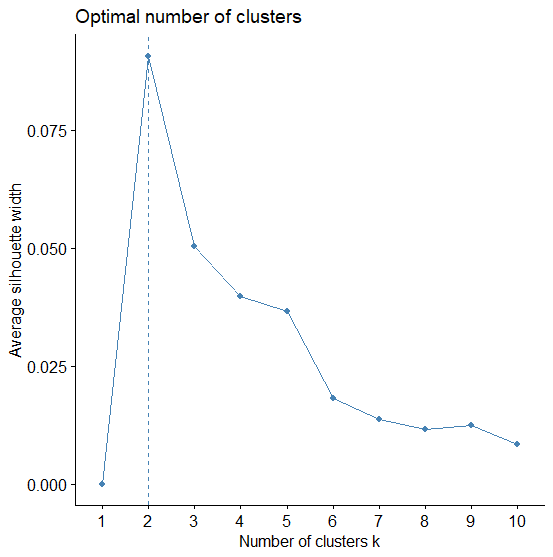

In [ ]:
# Dissimilarity matrix
d <- dist(sc, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete")

In [ ]:
# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1)

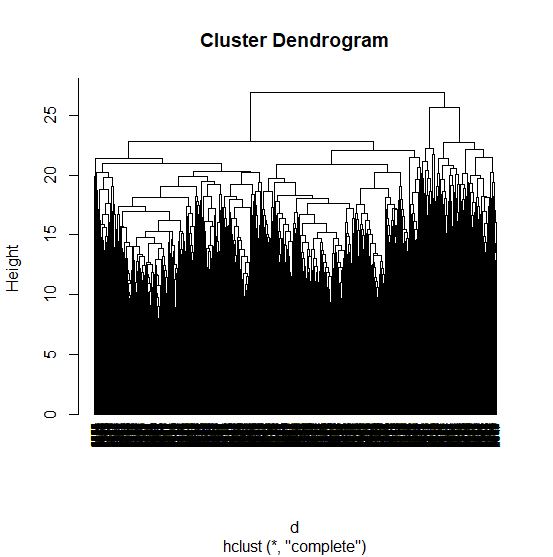

In [ ]:
# Ward's method
hc5 <- hclust(d, method = "ward.D2" )

In [ ]:
# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)
plot(hc5, cex = 0.6)
rect.hclust(hc5, k = 4, border = 2:5)

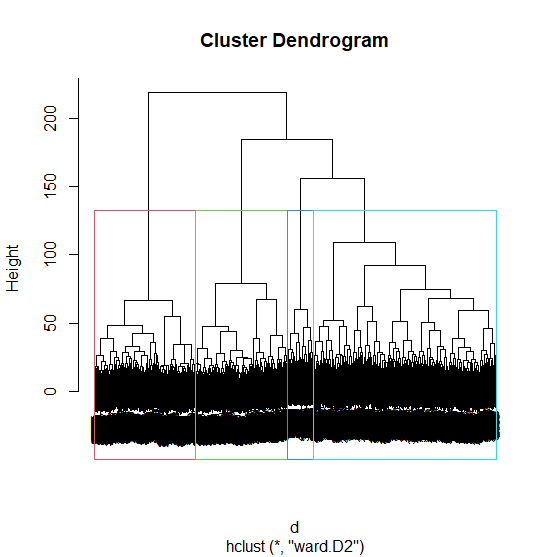

In [ ]:
# hclust over data - alternative
res <- hcut(movtable[1:nrow(movtable),2:ncol(movtable)], k = 4, stand = TRUE)

In [ ]:
# Visualize
fviz_dend(res, rect = TRUE, cex = 0.5,
          k_colors = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"))

## Results
2 clusters seem to be the best result.